In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sb
import altair  as alt
import matplotlib.pyplot as plt
import missingno as msno
import unidecode

alt.data_transformers.disable_max_rows();

In [2]:
train = pd.read_csv("data/train.csv",            index_col="Id")
test  = pd.read_csv("data/test.csv",             index_col="Id")
sub   = pd.read_csv("data/sampleSubmission.csv", index_col="Id")

In [3]:
train.head()

,Marca,Modelo,Tiempo,Provincia,Localidad,Año,Kms,Cambio,Cv,Combust,Puertas,Vendedor,Precio
Id,,,,,,,,,,,,,
0,OPEL,VECTRA,33 días,la_rioja,Arnedo,2005.0,200000.0,manual,120.0,diesel,5.0,Profesional,2200
1,NISSAN,PRIMERA,43 horas,aragon,Teruel,2008.0,400000.0,manual,100.0,diesel,4.0,Particular,3500
2,RENAULT,CLIO BUSINESS DCI 75 ECO2,14 horas,sevilla,Camas,2014.0,53565.0,manual,75.0,diesel,5.0,Profesional,8200
3,MERCEDES-BENZ,CLASE CLS,1 hora,burgos,Burgos,2007.0,215000.0,automat,224.0,diesel,4.0,Particular,12500
4,RENAULT,CAPTUR LIFE ENERGY DCI 90 ECO2 EURO 6,45 días,caceres,Caceres,2016.0,119945.0,manual,90.0,diesel,5.0,Profesional,9900


# Clean

In [4]:
def cleanString(valor):
    return unidecode.unidecode(valor.upper().strip())

def clean(data):
    data['Marca']  = data['Marca'].apply(cleanString)
    data['Modelo'] = data['Modelo'].apply(cleanString)

    data['Marca'].replace("MERCEDES", "MERCEDES-BENZ",     inplace=True)
    data['Modelo'].replace("SERIE ", "SERIE_", regex=True, inplace=True)
    data['Modelo'].replace("CLASE ", "CLASE_", regex=True, inplace=True)
    data['Modelo'].replace("RANGE ROVER ", "", regex=True, inplace=True)
    
    return data

train = clean(train)
test  = clean(test)

# Distributions

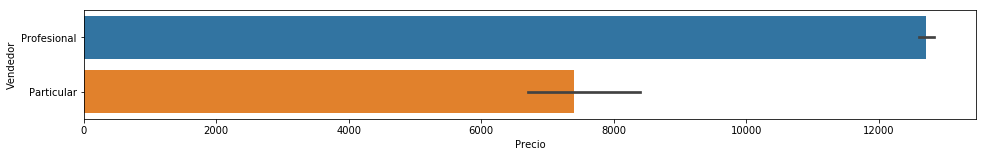

In [5]:
plt.figure(figsize=(16,2))
sb.barplot(x='Precio', y="Vendedor", data=train);

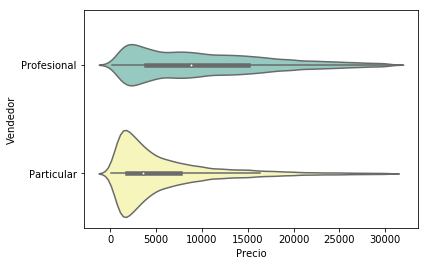

In [6]:
train.Precio.quantile(.95)
filtered = train[train.Precio < train.Precio.quantile(.95)]

#plt.figure(figsize=(16,4))
sb.violinplot(y="Vendedor", x="Precio", palette="Set3", data=filtered);

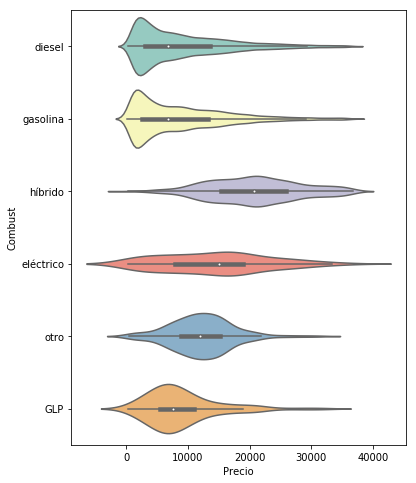

In [8]:
filtered = train[train.Precio < train.Precio.quantile(.97)]

plt.figure(figsize=(6,8))
sb.violinplot(y="Combust", x="Precio", palette="Set3", data=filtered);

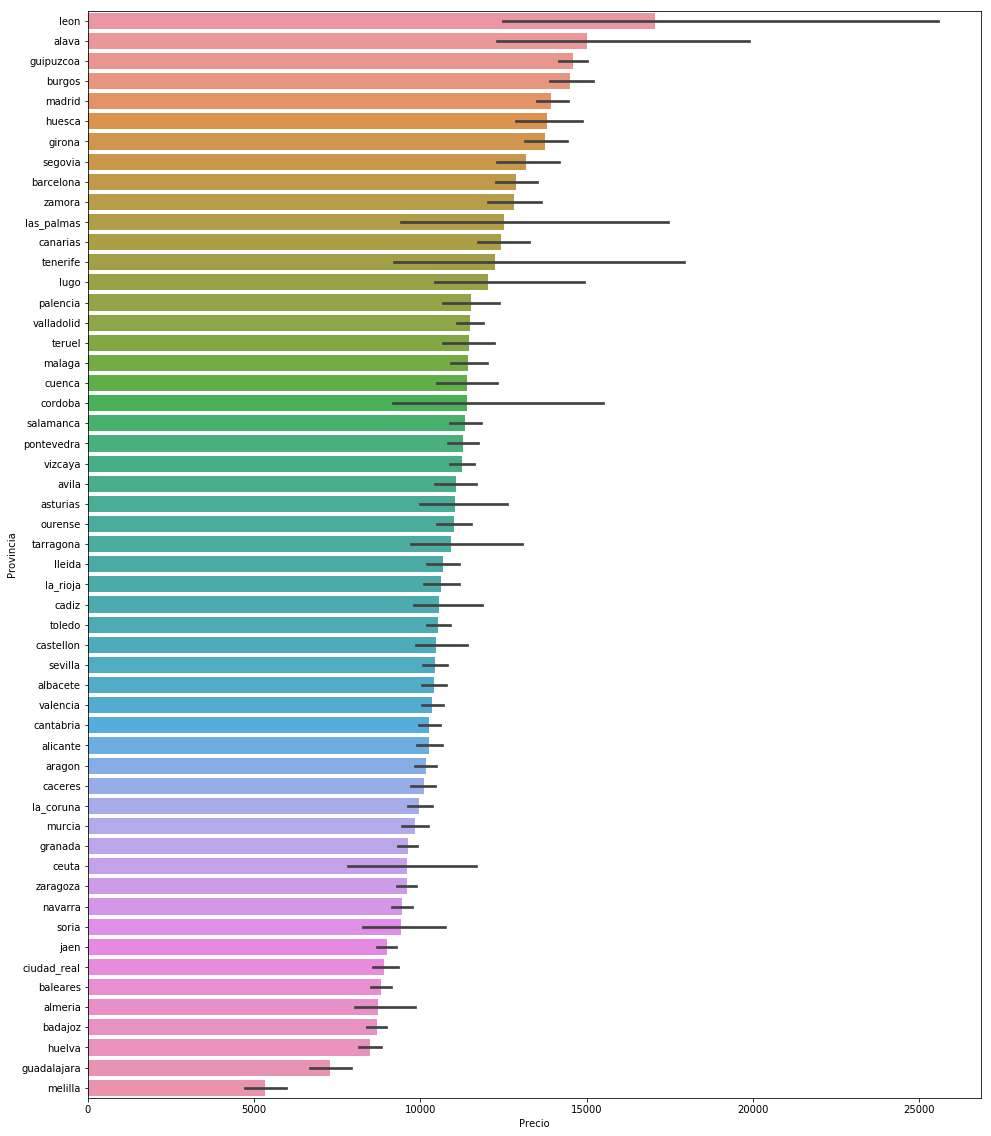

In [82]:
result = train.groupby(["Provincia"])['Precio'].aggregate(np.mean).reset_index().sort_values('Precio', ascending=False)

plt.figure(figsize=(16,20))
sb.barplot(x='Precio', y="Provincia", data=train, order=result['Provincia']);

In [47]:
#train.groupby(['Marca']).agg({'Precio' : ['mean', 'std', 'median']})
#train.groupby(["Marca"])['Precio'].aggregate(np.mean).reset_index().sort_values('Precio', ascending=False)

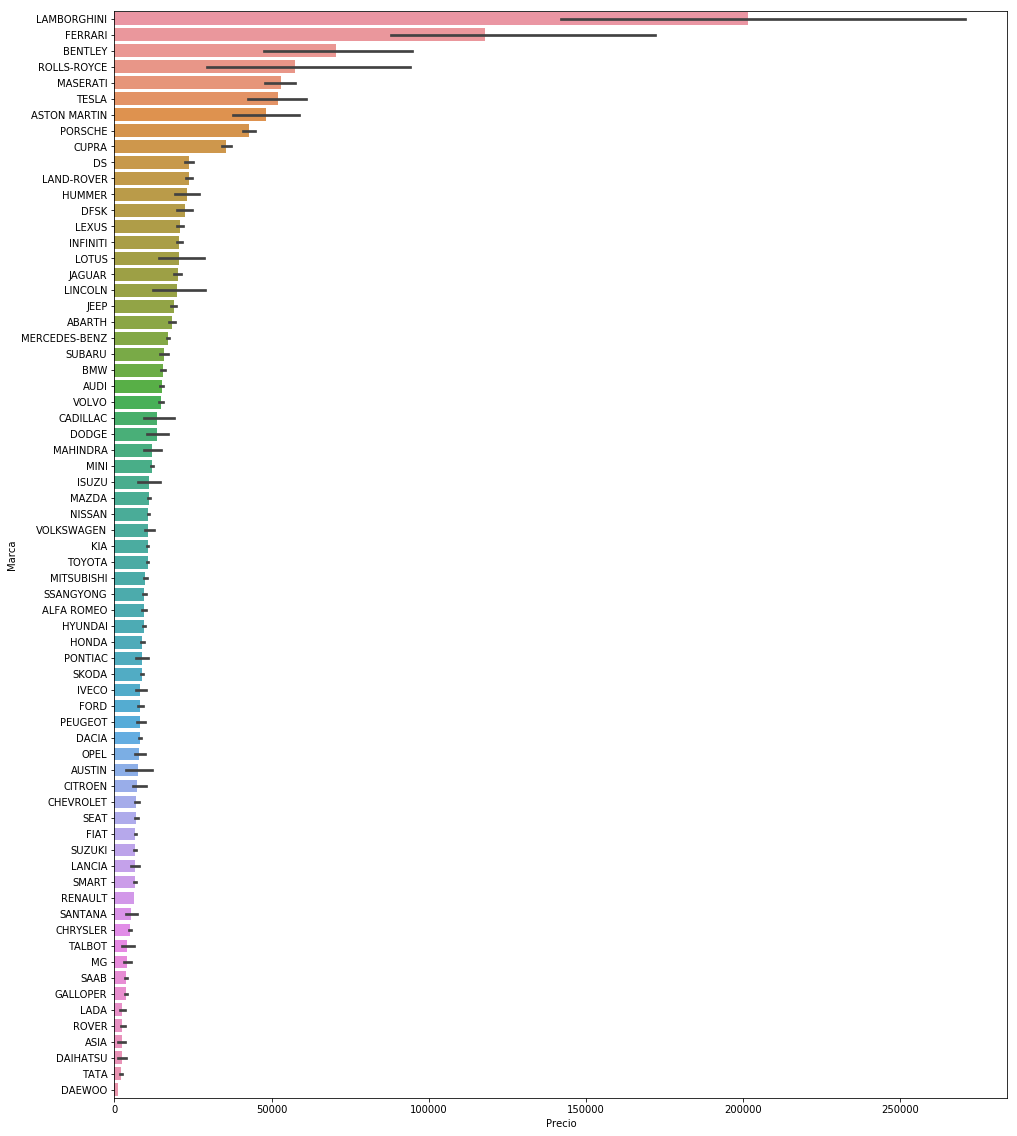

In [44]:
result = train.groupby(["Marca"])['Precio'].aggregate(np.mean).reset_index().sort_values('Precio', ascending=False)

plt.figure(figsize=(16,20))
sb.barplot(x='Precio', y="Marca", data=train, order=result['Marca']);

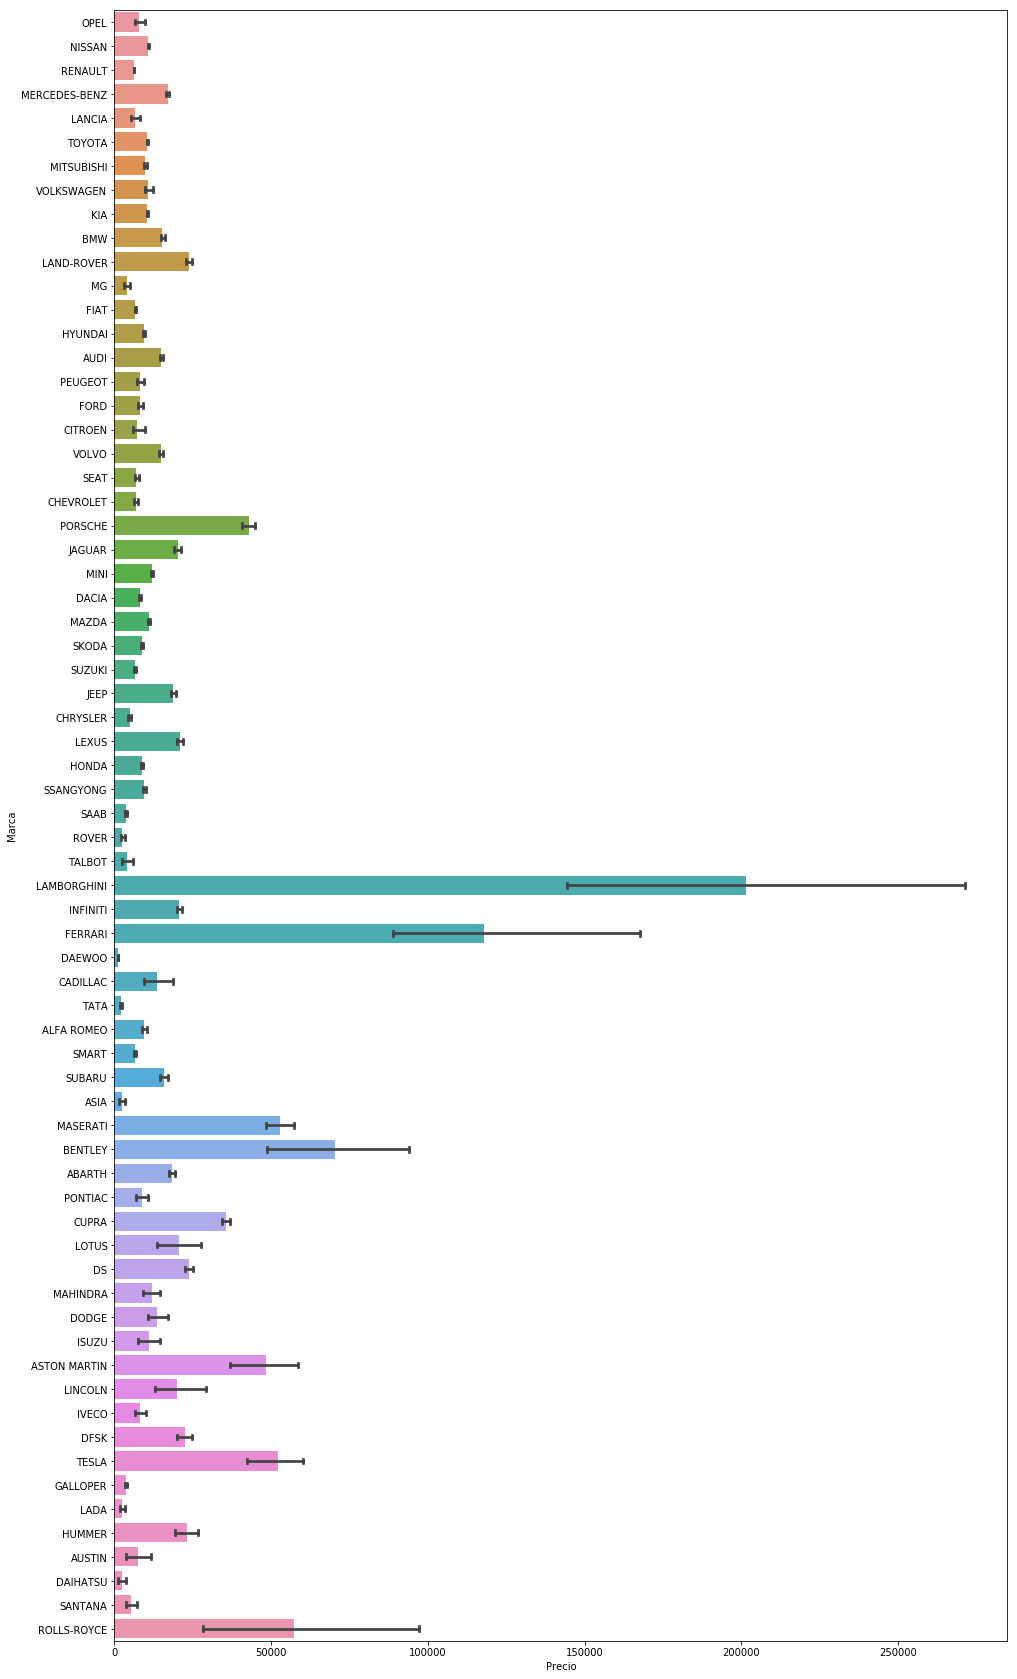

In [21]:
plt.figure(figsize=(16,30))
sb.barplot(x="Precio", y="Marca", order = fraud_df['Customer ID'], capsize=.2, data=train);

In [7]:
alt.Chart(train.sample(5000)).mark_circle(size=60).encode(
    x='Cv',
    y='Precio',
    #color='Origin',
    tooltip=['Marca', 'Modelo']
).interactive()

alt.Chart(...)

In [11]:
alt.Chart(train.sample(5000)).mark_circle().encode(
    x='Kms',
    y='Precio',
    #color='Origin',
    tooltip=['Marca', 'Modelo']
).interactive()

alt.Chart(...)